In [960]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = 500 # this will set limit of columns to 500
pd.options.display.max_rows = 10


In [961]:
dataset = pd.read_csv('datasets/q1_q17_dr25_sup_koi_2024.04.11_11.47.30.csv')
# dataset = dataset.sample(956)


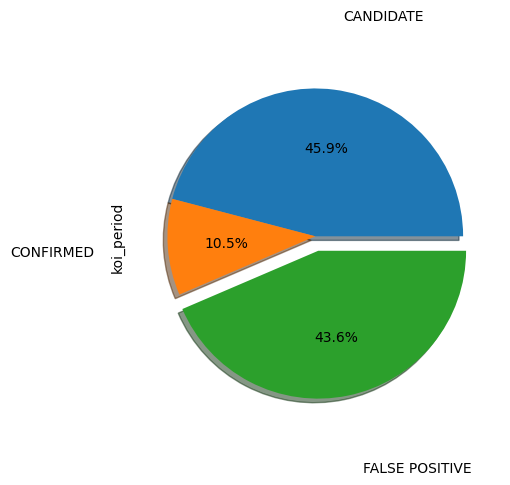

In [962]:
df = dataset.groupby(['koi_disposition']).sum().reset_index()
df = df.set_index('koi_disposition')
plot = df.plot.pie(y='koi_period', legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0, labeldistance=1.5, )

In [963]:
dataset = dataset.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
dataset.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [964]:
dataset['ExoplanetCandidate'] = dataset['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)


In [965]:
dataset['ExoplanetConfirmed'] = dataset['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [966]:
# Remover linhas com valores nulos na coluna 'OrbitalPeriod[days'
dataset = dataset.dropna(subset=['OrbitalPeriod[days'])

# Converter a coluna 'OrbitalPeriod[days' para float, se necessário
dataset['OrbitalPeriod[days'] = dataset['OrbitalPeriod[days'].astype(float)

# Verificar se há valores nulos na coluna de disposição (confirmação)
print(dataset['ExoplanetArchiveDisposition'].unique())


['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


27.75980719065111
167.69345235294043
65.13893331009133


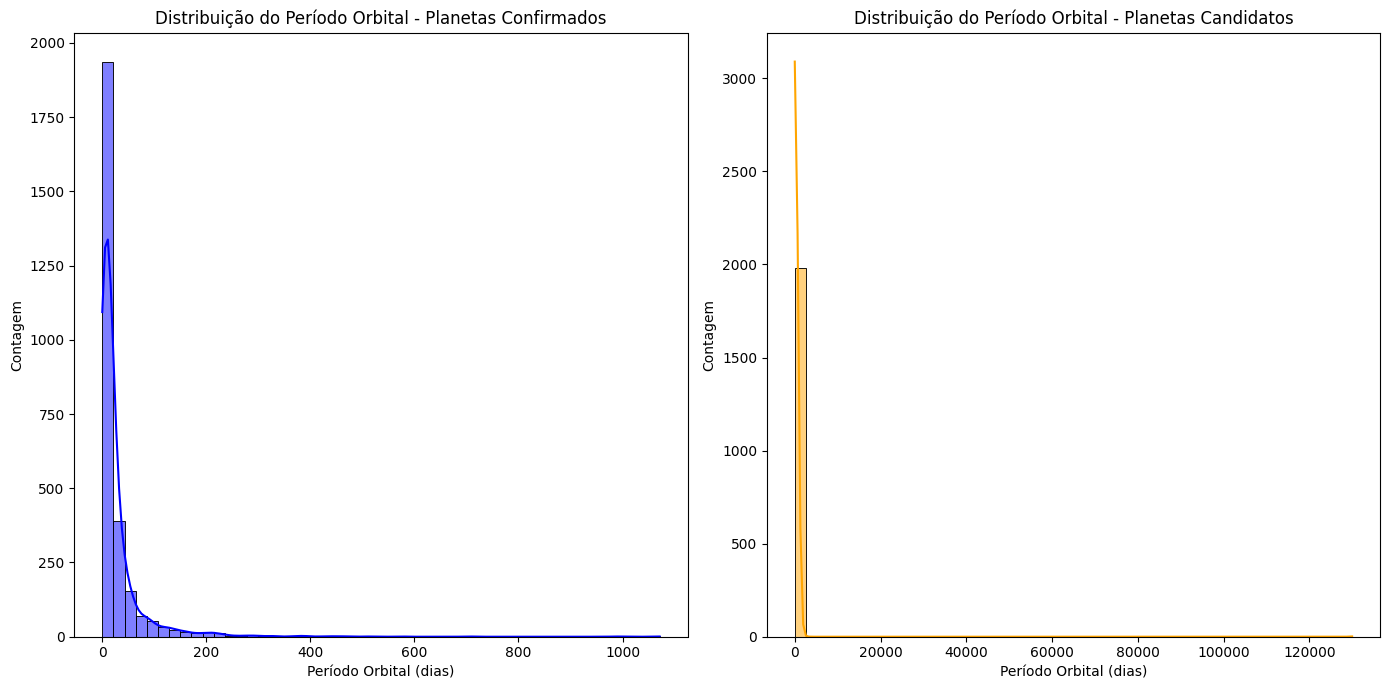

In [967]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para planetas confirmados e candidatos
confirmados = dataset[dataset['ExoplanetArchiveDisposition'] == 'CONFIRMED']
candidatos = dataset[dataset['ExoplanetArchiveDisposition'] == 'CANDIDATE']
falsopositivo = dataset[dataset['ExoplanetArchiveDisposition'] == 'FALSE POSITIVE']

print(confirmados['OrbitalPeriod[days'].mean())
print(candidatos['OrbitalPeriod[days'].mean())
print(falsopositivo['OrbitalPeriod[days'].mean())

# Visualizar a distribuição do período orbital para planetas confirmados e candidatos
plt.figure(figsize=(14, 7))

# Histograma para planetas confirmados
plt.subplot(1, 2, 1)
sns.histplot(confirmados['OrbitalPeriod[days'], bins=50, kde=True, color='blue')
plt.title('Distribuição do Período Orbital - Planetas Confirmados')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

# Histograma para planetas candidatos
plt.subplot(1, 2, 2)
sns.histplot(candidatos['OrbitalPeriod[days'], bins=50, kde=True, color='orange')
plt.title('Distribuição do Período Orbital - Planetas Candidatos')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


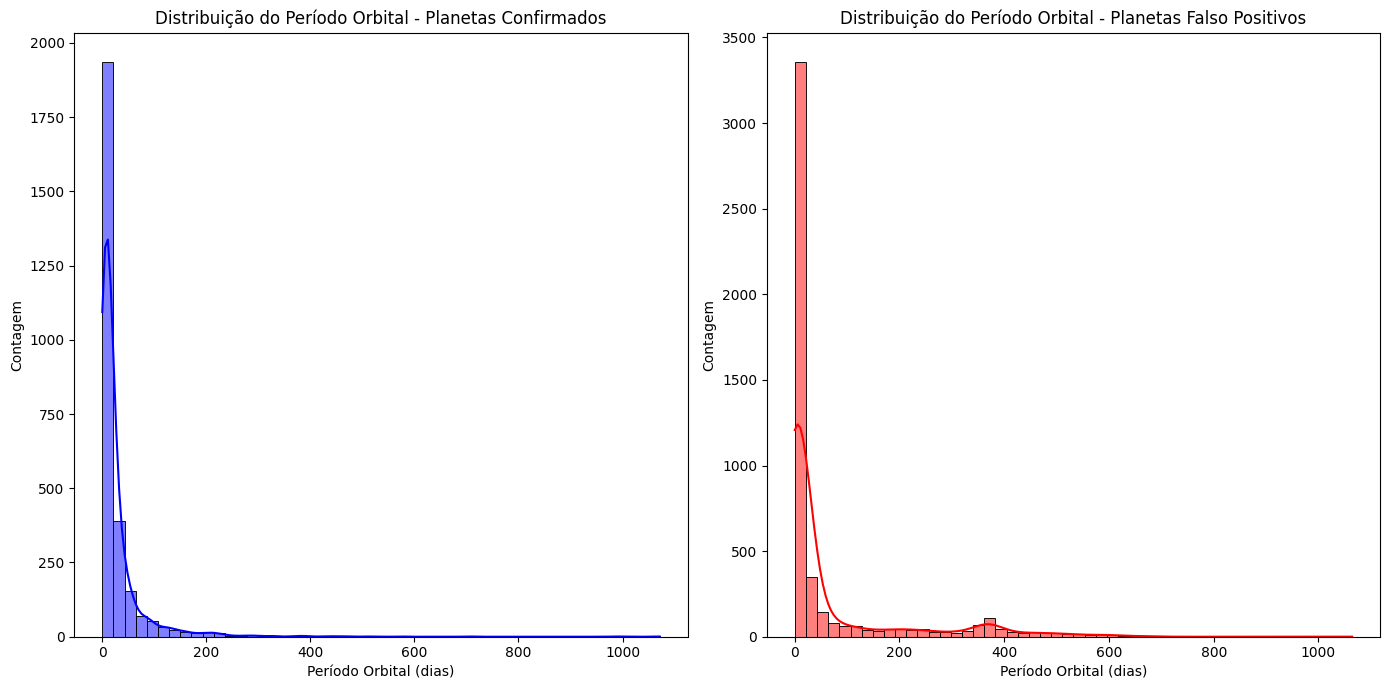

In [968]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para planetas confirmados e candidatos
confirmados = dataset[dataset['ExoplanetArchiveDisposition'] == 'CONFIRMED']
falsopositivo = dataset[dataset['ExoplanetArchiveDisposition'] == 'FALSE POSITIVE']

# Visualizar a distribuição do período orbital para planetas confirmados e candidatos
plt.figure(figsize=(14, 7))

# Histograma para planetas confirmados
plt.subplot(1, 2, 1)
sns.histplot(confirmados['OrbitalPeriod[days'], bins=50, kde=True, color='blue')
plt.title('Distribuição do Período Orbital - Planetas Confirmados')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

# Histograma para planetas candidatos
plt.subplot(1, 2, 2)
sns.histplot(falsopositivo['OrbitalPeriod[days'], bins=50, kde=True, color='red')
plt.title('Distribuição do Período Orbital - Planetas Falso Positivos')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


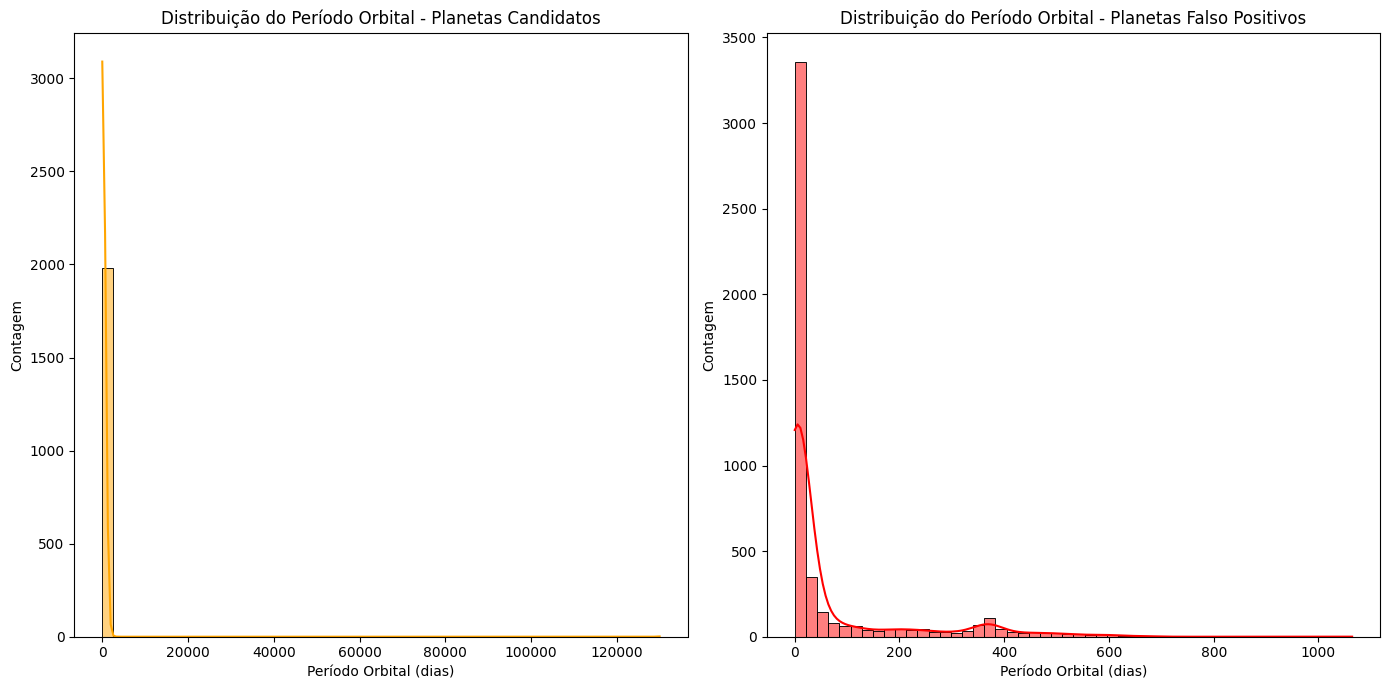

In [969]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para planetas confirmados e candidatos
candidatos = dataset[dataset['ExoplanetArchiveDisposition'] == 'CANDIDATE']
falsopositivo = dataset[dataset['ExoplanetArchiveDisposition'] == 'FALSE POSITIVE']

# Visualizar a distribuição do período orbital para planetas confirmados e candidatos
plt.figure(figsize=(14, 7))

# Histograma para planetas confirmados
plt.subplot(1, 2, 1)
sns.histplot(candidatos['OrbitalPeriod[days'], bins=50, kde=True, color='orange')
plt.title('Distribuição do Período Orbital - Planetas Candidatos')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

# Histograma para planetas candidatos
plt.subplot(1, 2, 2)
sns.histplot(falsopositivo['OrbitalPeriod[days'], bins=50, kde=True, color='red')
plt.title('Distribuição do Período Orbital - Planetas Falso Positivos')
plt.xlabel('Período Orbital (dias)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


In [970]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

data = dataset[['OrbitalPeriod[days', 'ExoplanetArchiveDisposition']]

# Separar os dados em dois grupos: confirmados e não confirmados
confirmed = data[data['ExoplanetArchiveDisposition'] == 'CONFIRMED']['OrbitalPeriod[days']
not_confirmed = data[data['ExoplanetArchiveDisposition'] != 'CONFIRMED']['OrbitalPeriod[days']

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(confirmed, not_confirmed)

# Verificar o resultado do teste
print("Valor t:", t_stat)
print("Valor p:", p_value)

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa no OrbitalPeriod entre planetas confirmados e não confirmados.")
else:
    print("Não há uma diferença significativa no OrbitalPeriod entre planetas confirmados e não confirmados.")


Valor t: -2.2265925522752243
Valor p: 0.025997720502660172
Há uma diferença significativa no OrbitalPeriod entre planetas confirmados e não confirmados.


In [971]:
# Calcular estatísticas descritivas para os períodos orbitais
estatisticas_confirmados = confirmados['OrbitalPeriod[days'].describe()
estatisticas_candidatos = candidatos['OrbitalPeriod[days'].describe()
estatisticas_falsopositivo = falsopositivo['OrbitalPeriod[days'].describe()

print("Estatísticas Descritivas - Planetas Confirmados")
print(estatisticas_confirmados)

print("\nEstatísticas Descritivas - Planetas Candidatos")
print(estatisticas_candidatos)

print("\nEstatísticas Descritivas - Planetas estatisticas_falsopositivo")
print(estatisticas_falsopositivo)


Estatísticas Descritivas - Planetas Confirmados
count    2743.000000
mean       27.759807
std        56.253323
min         0.341842
25%         5.106565
50%        11.329771
75%        26.110233
max      1071.232624
Name: OrbitalPeriod[days, dtype: float64

Estatísticas Descritivas - Planetas Candidatos
count      1982.000000
mean        167.693452
std        2922.603558
min           0.259820
25%           6.306291
50%          20.128482
75%         118.705778
max      129995.778400
Name: OrbitalPeriod[days, dtype: float64

Estatísticas Descritivas - Planetas estatisticas_falsopositivo
count    4839.000000
mean       65.138933
std       131.497315
min         0.241843
25%         1.386909
50%         5.243853
75%        36.293228
max      1064.268096
Name: OrbitalPeriod[days, dtype: float64


In [972]:
dataset.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [973]:
dataset.head()

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [974]:
dataset.isna().any()


DispositionScore                True
OrbitalPeriod[days             False
OrbitalPeriodUpperUnc.[days     True
OrbitalPeriodLowerUnc.[days     True
TransitEpoch[BKJD              False
                               ...  
RA[decimaldegrees              False
Dec[decimaldegrees             False
Kepler-band[mag]                True
ExoplanetCandidate             False
ExoplanetConfirmed             False
Length: 39, dtype: bool

In [975]:
dataset.shape

(9564, 39)

In [976]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataset)

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9561,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0
9562,0.092,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.1,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0,1.0


In [977]:
# Evaluation function

def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_)) 

In [978]:
features = dataset[['OrbitalPeriod[days', 'OrbitalPeriodUpperUnc.[days']]
target = dataset.ExoplanetCandidate

In [979]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.40)


In [980]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.4820627802690583
Recall: 0.8034398034398035
F1 Score: 0.6180014174344438
Precision: 0.5021113243761997

Confusion Matrix:
 TN,  FP, FN, TP
[ 197 1297  320 1308]


In [981]:
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan',weights='uniform')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.6668802049967969
Recall: 0.7094594594594594
F1 Score: 0.6895522388059702
Precision: 0.6707317073170732

Confusion Matrix:
 TN,  FP, FN, TP
[ 927  567  473 1155]


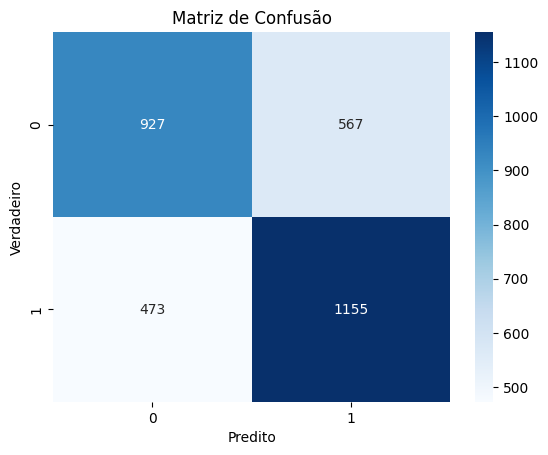

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1494
           1       0.67      0.71      0.69      1628

    accuracy                           0.67      3122
   macro avg       0.67      0.66      0.67      3122
weighted avg       0.67      0.67      0.67      3122



In [982]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Supondo que X_train, X_test, y_train, y_test já estejam definidos
# Seu modelo KNN
knn = KNeighborsClassifier(leaf_size=8, metric='manhattan', weights='uniform')

# Ajustando o modelo ao conjunto de treino
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Função de avaliação (incluindo matriz de confusão e relatório de classificação)
def evaluation(y_test, y_pred):
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()

    # Relatório de classificação
    cr = classification_report(y_test, y_pred)
    print(cr)

# Avaliando o modelo
evaluation(y_test, y_pred)


# Converter .csv to ARFF file

In [983]:
import csv
import os

fileToRead = "out.csv"  #csv file name or absolute path to be open.
fileToWrite = "datasets/kepler.arff" #name as how you'll save your arff file.
relation = "Exoplanets Candidates Kepler" #how you'll like to call your relation as.

dataType = [] # Stores data types 'nominal' and 'numeric'
columnsTemp = [] # Temporary stores each column of csv file except the attributes
uniqueTemp = [] # Temporary Stores each data cell unique of each column
uniqueOfColumn = [] # Stores each data cell unique of each column
dataTypeTemp = [] # Temporary stores the data type for cells on each column
finalDataType = [] # Finally stores data types 'nominal' and 'numeric'
attTypes = [] # Stores data type 'numeric' and nominal data for attributes
p = 0 # pointer for each cell of csv file

writeFile = open(fileToWrite, 'w')

#Opening and Reading a CSV file
f = open(fileToRead, 'r')
reader = csv.reader(f)
allData = list(reader)
attributes = allData[0]
totalCols = len(attributes)
totalRows = len(allData)
f.close()

# Add a '0' for each empty cell
for j in range(0,totalCols):
	for i in range(0,totalRows):
		if 0 == len(allData[i][j]):
			allData[i][j] = "0"

# check for comams or blanks and adds single quotes
for j in range(0,totalCols):
	for i in range(1,totalRows):
		allData[i][j] = allData[i][j].lower()
		if "\r" in allData[i][j] or '\r' in allData[i][j] or "\n" in allData[i][j] or '\n' in allData[i][j]:
			allData[i][j] = allData[i][j].rstrip(os.linesep)
			allData[i][j] = allData[i][j].rstrip("\n")
			allData[i][j] = allData[i][j].rstrip("\r")
		try:
			if allData[i][j] == str(float(allData[i][j])) or allData[i][j] == str(int(allData[i][j])):
				print
		except ValueError as e:
				allData[i][j] = "'" + allData[i][j] + "'"

# fin gives unique cells for nominal and numeric
for j in range(0,totalCols):
	for i in range(1,totalRows):
		columnsTemp.append(allData[i][j])
	for item in columnsTemp:
		if not (item in uniqueTemp):
			uniqueTemp.append(item)
	uniqueOfColumn.append("{" + ','.join(uniqueTemp) + "}") 
	uniqueTemp = []
	columnsTemp = []

# Assigns numeric or nominal to each cell
for j in range(1,totalRows):
	for i in range(0,totalCols):
		try:
			if allData[j][i] == str(float(allData[j][i])) or allData[j][i] == str(int(allData[j][i])):
				dataType.append("numeric")
		except ValueError as e:
				dataType.append("nominal")

for j in range(0,totalCols): 
	p = j
	for i in range(0,(totalRows-1)): 
		dataTypeTemp.append(dataType[p])
		p += totalCols  
	if "nominal" in dataTypeTemp:
		finalDataType.append("nominal")
	else:
		finalDataType.append("numeric")
	dataTypeTemp = []

for i in range(0,len(finalDataType )):
	if finalDataType [i] == "nominal":
		attTypes.append(uniqueOfColumn[i])
	else:
		attTypes.append(finalDataType[i])

# Show comments
writeFile.write("%\n% Comments go after a '%' sign.\n%\n")
writeFile.write("%\n% Relation: " + relation +"\n%\n%\n")
writeFile.write("% Attributes: " + str(totalCols) + " "*5 
	+ "Instances: " + str(totalRows-1) + "\n%\n%\n\n")

# Show Relation
writeFile.write("@relation " + relation + "\n\n")

# Show Attributes
for i in range(0,totalCols):
	writeFile.write("@attribute" + " '" + attributes[i] 
		+ "' " + attTypes[i] + "\n")

# Show Data
writeFile.write("\n@data\n")
for i in range(1,totalRows):
	writeFile.write(','.join(allData[i])+"\n")

print(fileToWrite + " was converted to " + fileToRead)

datasets/kepler.arff was converted to out.csv
